In [79]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## 1) 載入資料集

In [80]:
# df_train = pd.read_csv('./data/Iris.csv')
df_train = pd.read_csv('https://github.com/tempzeba/iot_test_public/releases/download/iot_data/A1L02001_log_01.csv', sep='\t')
df_train = df_train.drop(labels=[r'收集日期', 
r'抽樣秒', 
r'位址區段E32768紀錄時間', 
r'位址區段G32768紀錄時間', 
r'位址區段G12288紀錄時間',
r'機台編號',
r'目前生產配方'],axis=1) # 移除Id
# df_train = pd.read_csv('https://github.com/tempzeba/iris-dnn-tensorflow/raw/master/data/Iris.csv')
# df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
df_train

,壓力檢測啟動,入胚啟動,加熱啟動,吹瓶啟動,機台異常或無異常,自動或手動,總生產數量,Cycle_Time,低壓壓力,高壓壓力,回收壓力,預吹壓力,最多成型時間,第一穴預吹延遲,第二穴預吹延遲,第三穴預吹延遲,第四穴預吹延遲,第五穴預吹延遲,第六穴預吹延遲,第七穴預吹延遲,第八穴預吹延遲,第九穴預吹延遲,第十穴預吹延遲,第一穴高壓延遲,第二穴高壓延遲,第三穴高壓延遲,第四穴高壓延遲,第五穴高壓延遲,第六穴高壓延遲,第七穴高壓延遲,第八穴高壓延遲,第九穴高壓延遲,第十穴高壓延遲,第一穴吹高壓時間,第二穴吹高壓時間,第三穴吹高壓時間,第四穴吹高壓時間,第五穴吹高壓時間,第六穴吹高壓時間,第七穴吹高壓時間,...,第五層燈管加熱%,第六層燈管加熱%,第七層燈管加熱%,第八層燈管加熱%,第九層燈管加熱%,第十層燈管加熱%,滾筒速度,產能,吹氣鼓風機轉速,吸氣鼓風機轉速,自轉馬達轉速,整列滾筒調速,牙口鼓風機轉速,入胚啟動位置,入胚啟動延時,震動馬達震動時間,震動馬達震動循環時間,第一穴壓力檢測,第二穴壓力檢測,第三穴壓力檢測,第四穴壓力檢測,第五穴壓力檢測,第六穴壓力檢測,第七穴壓力檢測,第八穴壓力檢測,第九穴壓力檢測,第十穴壓力檢測,破瓶壓力檢測值設定,加熱箱一水道溫度,加熱箱二水道溫度,加熱箱三水道溫度,加熱箱四水道溫度,加熱箱五水道溫度,加熱箱六水道溫度,加熱箱七水道溫度,加熱箱八水道溫度,機台是否正常(0~59s),破瓶數量,異常代碼,破瓶數增加
0,1.0,0.0,0.0,0.0,0.0,0.0,25306.0,2304.0,8.4,33.5,11.4,11.2,948.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,45.0,66.5,47.0,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,23.8,24.6,24.3,24.8,24.3,24.4,25.1,25.2,39.0,1259.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,25306.0,2304.0,8.5,33.4,11.4,11.2,948.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,45.0,66.5,47.0,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,23.9,24.6,24.3,24.8,24.3,24.4,25.1,25.2,40.0,1259.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,25306.0,2304.0,8.6,33.4,11.3,11.1,948.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,45.0,66.5,47.0,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,23.9,24.6,24.4,24.8,24.3,24.5,25.3,25.2,42.0,1259.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,25306.0,2304.0,8.5,33.5,11.4,11.2,948.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,45.0,66.5,47.0,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,24.1,24.6,24.4,24.9,24.4,24.5,25.2,25.3,43.0,1259.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,25306.0,2304.0,8.5,33.6,11.4,11.3,948.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,45.0,66.5,47.0,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,24.1,24.8,24.4,24.9,24.4,24.6,25.3,25.3,44.0,1259.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99134,1.0,0.0,0.0,0.0,0.0,0.0,23763.0,2304.0,8.2,33.0,11.1,10.9,942.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,47.0,66.5,47.0,38.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,29.1,29.1,29.0,29.2,29.0,28.9,0.0,0.0,0.0,0.0,23.0,55.8,55.4,58.9,58.1,47.9,65.9,60.9,54.5,25.0,1330.0,0.0,0
99135,1.0,0.0,0.0,0.0,0.0,0.0,23763.0,2304.0,8.2,33.0,11.0,10.9,942.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,47.0,66.5,47.0,38.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,29.1,29.1,29.0,29.2,29.0,28.9,0.0,0.0,0.0,0.0,23.0,55.1,54.9,58.2,57.4,47.4,65.4,60.3,54.1,26.0,1330.0,0.0,0
99136,1.0,0.0,0.0,0.0,0.0,0.0,23763.0,2304.0,8.2,32.9,11.1,10.9,942.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,47.0,66.5,47.0,38.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,29.1,29.1,29.0,29.2,29.0,28.9,0.0,0.0,0.0,0.0,23.0,54.5,54.4,57.5,56.9,46.8,

## 4) 將輸出特徵做one-hot encoding
如何對欄位class做one-hot encoding？
#### class 的值有0,1,2

In [81]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df_train[r'異常代碼'])
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 4) 切割訓練集與測試集

In [82]:
pd.set_option('max_row',300)
# X=df_train.drop(labels=['Class'],axis=1)
X=df_train.drop(columns=[r'異常代碼'])
# X.isna().sum().sum()
# X
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
壓力檢測啟動,99139.0,0.999556,0.021062,0.0,1.0,1.0,1.0,1.0
入胚啟動,99139.0,0.943836,0.230238,0.0,1.0,1.0,1.0,1.0
加熱啟動,99139.0,0.990155,0.098732,0.0,1.0,1.0,1.0,1.0
吹瓶啟動,99139.0,0.988945,0.104561,0.0,1.0,1.0,1.0,1.0
機台異常或無異常,99139.0,0.088048,0.283366,0.0,0.0,0.0,0.0,1.0
自動或手動,99139.0,0.993444,0.080706,0.0,1.0,1.0,1.0,1.0
總生產數量,99139.0,27608.455946,19077.618745,0.0,10927.5,23887.0,44805.0,65534.0
Cycle_Time,99139.0,2304.000000,0.000000,2304.0,2304.0,2304.0,2304.0,2304.0
低壓壓力,99139.0,8.192733,0.149145,7.8,8.1,8.2,8.3,8.8
高壓壓力,99139.0,30.657395,1.834288,21.9,29.0,31.2,32.1,33.9


In [83]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=40)

In [84]:
print('訓練資料: ',X_train.shape)
print('測試資料: ',X_test.shape)
X_train

訓練資料:  (69397, 96)
測試資料:  (29742, 96)


,壓力檢測啟動,入胚啟動,加熱啟動,吹瓶啟動,機台異常或無異常,自動或手動,總生產數量,Cycle_Time,低壓壓力,高壓壓力,回收壓力,預吹壓力,最多成型時間,第一穴預吹延遲,第二穴預吹延遲,第三穴預吹延遲,第四穴預吹延遲,第五穴預吹延遲,第六穴預吹延遲,第七穴預吹延遲,第八穴預吹延遲,第九穴預吹延遲,第十穴預吹延遲,第一穴高壓延遲,第二穴高壓延遲,第三穴高壓延遲,第四穴高壓延遲,第五穴高壓延遲,第六穴高壓延遲,第七穴高壓延遲,第八穴高壓延遲,第九穴高壓延遲,第十穴高壓延遲,第一穴吹高壓時間,第二穴吹高壓時間,第三穴吹高壓時間,第四穴吹高壓時間,第五穴吹高壓時間,第六穴吹高壓時間,第七穴吹高壓時間,...,第四層燈管加熱%,第五層燈管加熱%,第六層燈管加熱%,第七層燈管加熱%,第八層燈管加熱%,第九層燈管加熱%,第十層燈管加熱%,滾筒速度,產能,吹氣鼓風機轉速,吸氣鼓風機轉速,自轉馬達轉速,整列滾筒調速,牙口鼓風機轉速,入胚啟動位置,入胚啟動延時,震動馬達震動時間,震動馬達震動循環時間,第一穴壓力檢測,第二穴壓力檢測,第三穴壓力檢測,第四穴壓力檢測,第五穴壓力檢測,第六穴壓力檢測,第七穴壓力檢測,第八穴壓力檢測,第九穴壓力檢測,第十穴壓力檢測,破瓶壓力檢測值設定,加熱箱一水道溫度,加熱箱二水道溫度,加熱箱三水道溫度,加熱箱四水道溫度,加熱箱五水道溫度,加熱箱六水道溫度,加熱箱七水道溫度,加熱箱八水道溫度,機台是否正常(0~59s),破瓶數量,破瓶數增加
34633,1.0,1.0,1.0,1.0,0.0,1.0,24575.0,2304.0,8.4,30.5,10.9,10.6,939.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,40.0,45.0,67.0,45.5,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,27.8,27.8,27.8,28.0,27.5,27.5,27.5,27.5,0.0,0.0,22.0,62.3,62.0,66.9,65.6,54.6,77.8,68.7,61.9,10.0,1261.0,0
35422,1.0,1.0,1.0,1.0,0.0,1.0,38634.0,2304.0,8.2,31.2,11.0,10.8,945.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,40.0,45.0,69.0,45.0,40.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,26.8,26.8,26.8,26.9,26.5,26.4,26.5,26.5,0.0,0.0,22.0,62.3,62.8,67.9,66.0,56.4,76.4,67.1,62.0,36.0,1261.0,0
52502,1.0,1.0,1.0,1.0,0.0,1.0,10980.0,2304.0,8.3,29.8,10.1,9.8,939.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,40.0,46.0,66.5,48.5,39.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,28.2,28.2,28.1,28.3,27.9,27.8,27.8,27.9,0.0,0.0,23.0,61.6,63.3,68.8,66.2,55.9,77.5,67.4,62.1,17.0,1297.0,0
14986,1.0,1.0,1.0,1.0,0.0,1.0,53636.0,2304.0,8.2,28.6,12.0,11.4,942.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,40.0,45.0,67.5,48.0,40.0,15.0,0.0,40.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,28.0,28.0,27.9,28.1,27.7,27.7,27.6,27.7,0.0,0.0,22.0,62.8,63.3,69.0,66.5,56.8,76.9,66.2,62.1,55.0,1259.0,0
88882,1.0,1.0,1.0,1.0,0.0,1.0,51716.0,2304.0,8.2,31.5,10.9,10.6,942.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,40.0,46.5,66.5,47.0,38.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,27.0,27.0,27.0,27.1,26.7,26.6,26.7,26.7,0.0,0.0,24.0,61.8,62.4,67.6,65.7,54.8,77.1,67.3,62.4,43.0,1306.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56760,1.0,1.0,1.0,1.0,0.0,1.0,27100.0,2304.0,8.0,31.9,10.9,10.7,945.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,40.0,46.5,68.0,49.0,39.0,15.0,0.0,40.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,27.3,27.3,27.3,27.5,27.1,27.0,27.0,27.0,0.0,0.0,23.0,62.1,63.3,68.6,66.3,55.3,77.3,69.0,62.3,58.0,1297.0,0
93176,1.0,1.0,1.0,1.0,0.0,1.0,1925.0,2304.0,8.4,27.6,10.7,10.4,939.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,40.0,46.5,66.5,47.0,38.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0,27.2,27.2,27.2,27.3,26.9,26.9,26.9,26.9,0.0,0.0,24.0,61.7,61.9,66.4,65.3,55.3,75.5,65.8,62.4,6.0,1306.0,0
80037,1.0,1.0,1.0,1.0,0.0,1.0,21960.0,2304.0,8.2,31.0,10.7,10.5,942.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,...,40.0,45.0,65.5,49.0,38.0,15.0,0.0,35.0,12500.0,30.0,40.0,40.0,55.0,20.0,5.0,9.0,10.0,30.0

## 5) 建立網路模型

In [85]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


In [86]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
model = Sequential()
model.add(Dense(8, Activation('relu'), input_dim=X.shape[-1]))
model.add(Dense(16, Activation('relu')))
model.add(Dense(193, Activation('softmax')))

In [87]:
model.summary()   # Weights = (4+1)*8+(8+1)*16+(16+1)*3

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 776       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_11 (Dense)             (None, 193)               3281      
Total params: 4,201
Trainable params: 4,201
Non-trainable params: 0
_________________________________________________________________


In [88]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=1000
epochs = 15

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Epoch 1/15
63/63 [==============================] - 1s 11ms/step - loss: 1307.9014 - acc: 0.0057 - val_loss: 186.9180 - val_acc: 0.0344
Epoch 2/15
63/63 [==============================] - 0s 7ms/step - loss: 26.8138 - acc: 0.7155 - val_loss: 6.8078 - val_acc: 0.8366
Epoch 3/15
63/63 [==============================] - 0s 6ms/step - loss: 6.5721 - acc: 0.8310 - val_loss: 5.3050 - val_acc: 0.8390
Epoch 4/15
63/63 [==============================] - 0s 7ms/step - loss: 5.1523 - acc: 0.8516 - val_loss: 4.0293 - val_acc: 0.8846
Epoch 5/15
63/63 [==============================] - 0s 7ms/step - loss: 3.6978 - acc: 0.8725 - val_loss: 2.7185 - val_acc: 0.8882
Epoch 6/15
63/63 [==============================] - 0s 7ms/step - loss: 2.2481 - acc: 0.8743 - val_loss: 1.3647 - val_acc: 0.8839
Epoch 7/15
63/63 [==============================] - 0s 6ms/step - loss: 0.9817 - acc: 0.8821 - val_loss: 0.7099 - val_acc: 0.9020
Epoch 8/15
63/63 [==============================] - 0s 7ms/step - loss: 0.7109 - ac

## 6) 觀察訓練結果

In [89]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

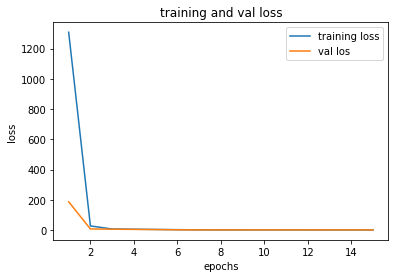

In [90]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

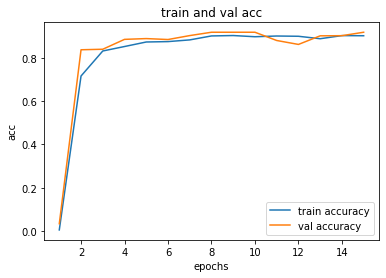

In [91]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 測試

In [92]:
from sklearn.metrics import accuracy_score
label=np.argmax(y,axis=1)
pred =  np.argmax(model.predict(X), axis=1)
print(pred.shape)
print(accuracy_score(label, pred))
print(y)

(99139,)
0.9119418190621249
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [93]:
from numpy import *
a = array([[1, 3], [2, 4], [5, 6]])
print(a.shape)

(3, 2)


In [94]:
# !pip install eli5

In [95]:


# import numpy as np
from eli5.permutation_importance import get_score_importances

# ... load data, define score function
def score(X, y):
    y_pred = np.argmax(model.predict(X), axis=1)
    return accuracy_score(y, y_pred)

lab=np.argmax(y_train,axis=1)
base_score, score_decreases = get_score_importances(score, X_train.values, lab)
feature_importances = np.mean(score_decreases, axis=0)



In [105]:
# print(feature_importances)
feature_importance_dict = {}
for i, feature_name in enumerate(X.columns.values.tolist()) :
	feature_importance_dict[feature_name]=feature_importances[i]

# print(dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True)[:5]))
sorted_fi = dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True))
for name,i in sorted_fi.items():
  print(name, i)

第四穴壓力檢測 5.7639379223761725e-06
第八穴壓力檢測 5.7639379223761725e-06
壓力檢測啟動 0.0
入胚啟動 0.0
加熱啟動 0.0
吹瓶啟動 0.0
機台異常或無異常 0.0
自動或手動 0.0
總生產數量 0.0
Cycle_Time 0.0
低壓壓力 0.0
高壓壓力 0.0
回收壓力 0.0
預吹壓力 0.0
最多成型時間 0.0
第一穴預吹延遲 0.0
第二穴預吹延遲 0.0
第三穴預吹延遲 0.0
第四穴預吹延遲 0.0
第五穴預吹延遲 0.0
第六穴預吹延遲 0.0
第七穴預吹延遲 0.0
第八穴預吹延遲 0.0
第九穴預吹延遲 0.0
第十穴預吹延遲 0.0
第一穴高壓延遲 0.0
第二穴高壓延遲 0.0
第三穴高壓延遲 0.0
第四穴高壓延遲 0.0
第五穴高壓延遲 0.0
第六穴高壓延遲 0.0
第七穴高壓延遲 0.0
第八穴高壓延遲 0.0
第九穴高壓延遲 0.0
第十穴高壓延遲 0.0
第一穴吹高壓時間 0.0
第二穴吹高壓時間 0.0
第三穴吹高壓時間 0.0
第四穴吹高壓時間 0.0
第五穴吹高壓時間 0.0
第六穴吹高壓時間 0.0
第七穴吹高壓時間 0.0
第八穴吹高壓時間 0.0
第九穴吹高壓時間 0.0
第十穴吹高壓時間 0.0
第一穴排氣時間 0.0
第二穴排氣時間 0.0
第三穴排氣時間 0.0
第四穴排氣時間 0.0
第五穴排氣時間 0.0
第六穴排氣時間 0.0
第七穴排氣時間 0.0
第八穴排氣時間 0.0
第九穴排氣時間 0.0
第十穴排氣時間 0.0
第一層燈管加熱% 0.0
第二層燈管加熱% 0.0
第三層燈管加熱% 0.0
第四層燈管加熱% 0.0
第五層燈管加熱% 0.0
第六層燈管加熱% 0.0
第七層燈管加熱% 0.0
第八層燈管加熱% 0.0
第九層燈管加熱% 0.0
第十層燈管加熱% 0.0
滾筒速度 0.0
產能 0.0
吹氣鼓風機轉速 0.0
吸氣鼓風機轉速 0.0
自轉馬達轉速 0.0
整列滾筒調速 0.0
牙口鼓風機轉速 0.0
入胚啟動位置 0.0
入胚啟動延時 0.0
震動馬達震動時間 0.0
震動馬達震動循環時間 0.0
第一穴壓力檢測 0.0
第二穴壓力檢測 0.0
第三穴壓力檢測 0.0
第五穴壓力檢測 0.0
第六穴壓力檢測 0.0
第